# **Demystifying Patent Activity**
---
**Team 01:**

Gunjan Sharma, Jasmine Gohil, Jenil Shah, Mahika Bhartari, Sneha Ekka

**Tableau Dashboard Link:**

https://public.tableau.com/views/BA875_Dashboard/Dashboard1?:language=en-US&publish=yes&:sid=&:display_count=n&:origin=viz_share_link

## 1 - Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## 2 - Uploading the Datasets

### 2.1 - Compustat Data (Individual Metrics)

In [ ]:
comp = pd.read_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset 0 UPDATED/Compustat_Company_Financials_Yearly_subset.csv')
wrds = pd.read_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset 0 UPDATED/WRDS_IBES_Company_Financials_Yearly_subset.csv')

In [ ]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164419 entries, 0 to 164418
Data columns (total 26 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   gvkey    164419 non-null  int64  
 1   fyear    164195 non-null  float64
 2   ticker   164299 non-null  object 
 3   cusip    164302 non-null  object 
 4   conm     164419 non-null  object 
 5   curncd   164195 non-null  object 
 6   at       124031 non-null  float64
 7   capx     108048 non-null  float64
 8   cogs     108931 non-null  float64
 9   emp      103468 non-null  float64
 10  invfg    78429 non-null   float64
 11  invrm    78068 non-null   float64
 12  invt     112399 non-null  float64
 13  invwip   77783 non-null   float64
 14  ni       108930 non-null  float64
 15  ppegt    100354 non-null  float64
 16  ppent    120399 non-null  float64
 17  revt     123436 non-null  float64
 18  xrd      49402 non-null   float64
 19  xsga     91117 non-null   float64
 20  busdesc  164214 non-null  

In [ ]:
comp.head()

,gvkey,fyear,ticker,cusip,conm,curncd,at,capx,cogs,emp,...,ppent,revt,xrd,xsga,busdesc,city,gind,gsector,naics,sic
0,1004,2009.0,AIR,000361105,AAR CORP,USD,1501.0420,28.855000,1065.902,5.8,...,334.42999,1352.1510,NaN,151.90401,AAR Corp. provides products and services to co...,Wood Dale,201010.0,20.0,423860.0,5080
1,1004,2010.0,AIR,000361105,AAR CORP,USD,1703.7271,124.879000,1408.071,6.1,...,417.76401,1775.7820,NaN,171.39900,AAR Corp. provides products and services to co...,Wood Dale,201010.0,20.0,423860.0,5080
2,1004,2011.0,AIR,000361105,AAR CORP,USD,2195.6531,91.218002,1662.408,6.7,...,456.01501,2074.4980,NaN,189.39700,AAR Corp. provides products and services to co...,Wood Dale,201010.0,20.0,423860.0,5080
3,1004,2012.0,AIR,000361105,AAR CORP,USD,2136.8999,37.599998,1714.500,6.3,...,426.39999,2167.1001,NaN,207.39999,AAR Corp. provides products and services to co...,Wood Dale,201010.0,20.0,423860.0,5080
4,1004,2013.0,AIR,000361105,AAR CORP,USD,2199.5000,26.500000,1581.400,5.8,...,413.29999,2035.0000,NaN,197.60001,AAR Corp. provides products and services to co...,Wood Dale,201010.0,20.0,423860.0,5080


In [ ]:
# Count null values
null_counts_1 = comp.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_1 = pd.DataFrame({'Column Name': null_counts_1.index, 'Null Count': null_counts_1.values, 'Null %': null_counts_1.values/len(comp)})

# Sort by null counts in descending order
null_counts_df_1 = null_counts_df_1.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_1

,Column Name,Null Count,Null %
18,xrd,115017,0.699536
13,invwip,86636,0.526922
11,invrm,86351,0.525189
10,invfg,85990,0.522993
19,xsga,73302,0.445824
15,ppegt,64065,0.389645
9,emp,60951,0.370705
7,capx,56371,0.342850
14,ni,55489,0.337485
8,cogs,55488,0.337479


### 2.2 - WRDS Data (Financial Ratios)

In [ ]:
wrds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54022 entries, 0 to 54021
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gvkey            54022 non-null  int64  
 1   ticker           52123 non-null  object 
 2   cusip            52256 non-null  object 
 3   year             54022 non-null  int64  
 4   roa              53882 non-null  float64
 5   invt_act         43842 non-null  float64
 6   cash_conversion  38614 non-null  float64
 7   inv_turn         38465 non-null  float64
 8   at_turn          51732 non-null  float64
 9   rd_sale          54022 non-null  float64
 10  staff_sale       51406 non-null  float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.5+ MB


In [ ]:
wrds.head()

,gvkey,ticker,cusip,year,roa,invt_act,cash_conversion,inv_turn,at_turn,rd_sale,staff_sale
0,1004,AIR,00036110,2009,0.09050,0.56750,185.16650,2.29200,0.99400,0.0,0.0
1,1004,AIR,00036110,2010,0.08250,0.57850,173.64026,2.43850,1.00475,0.0,0.0
2,1004,AIR,00036110,2011,0.10750,0.57025,141.28000,2.88250,1.10100,0.0,0.0
3,1004,AIR,00036110,2012,0.11625,0.57525,139.31575,2.86400,1.01350,0.0,0.0
4,1004,AIR,00036110,2013,0.11275,0.56450,155.10126,2.68475,0.94325,0.0,0.0


In [ ]:
# Count null values
null_counts_2 = wrds.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_2 = pd.DataFrame({'Column Name': null_counts_2.index, 'Null Count': null_counts_2.values, 'Null %': null_counts_2.values/len(comp)})

# Sort by null counts in descending order
null_counts_df_2 = null_counts_df_2.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_2

,Column Name,Null Count,Null %
7,inv_turn,15557,0.094618
6,cash_conversion,15408,0.093712
5,invt_act,10180,0.061915
10,staff_sale,2616,0.015911
8,at_turn,2290,0.013928
1,ticker,1899,0.011550
2,cusip,1766,0.010741
4,roa,140,0.000851
0,gvkey,0,0.000000
3,year,0,0.000000


In [ ]:
wrds_cleaned = wrds.dropna()

In [ ]:
print(wrds.shape[0])
print(wrds_cleaned.shape[0])

54022
27511


In [ ]:
wrds.rd_sale.describe()

count     54022.000000
mean          6.917275
std         577.586527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.064741
max      129755.700000
Name: rd_sale, dtype: float64

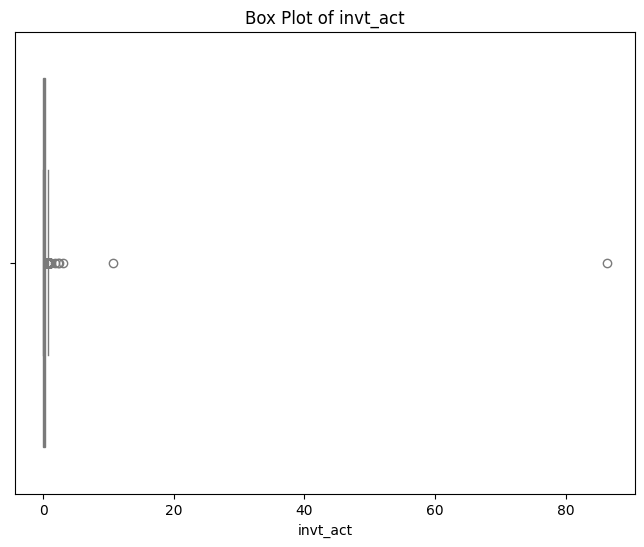

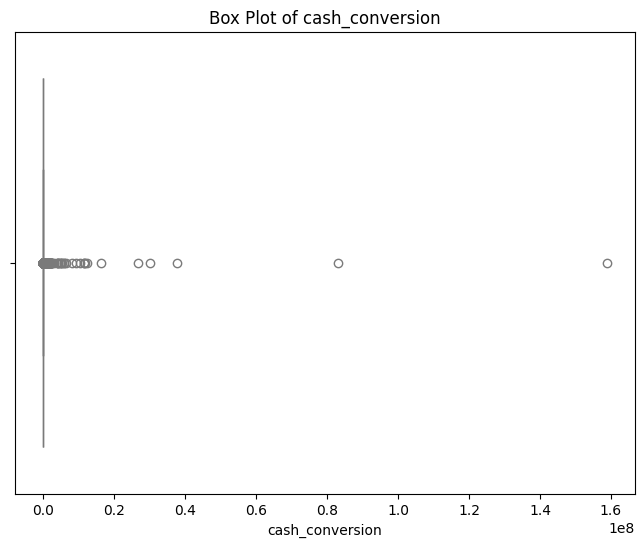

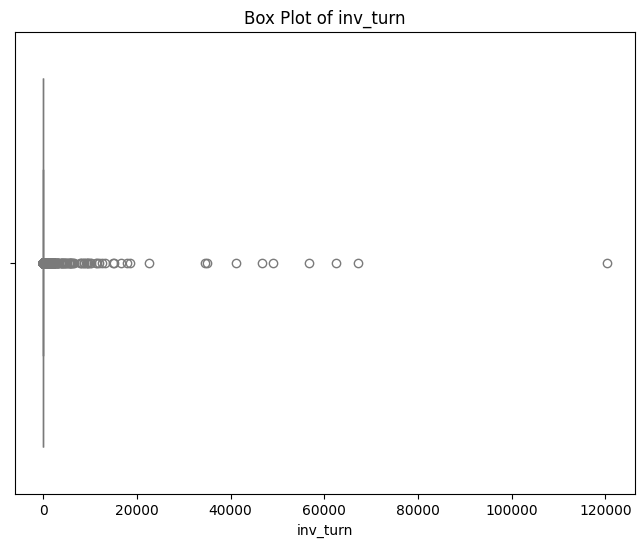

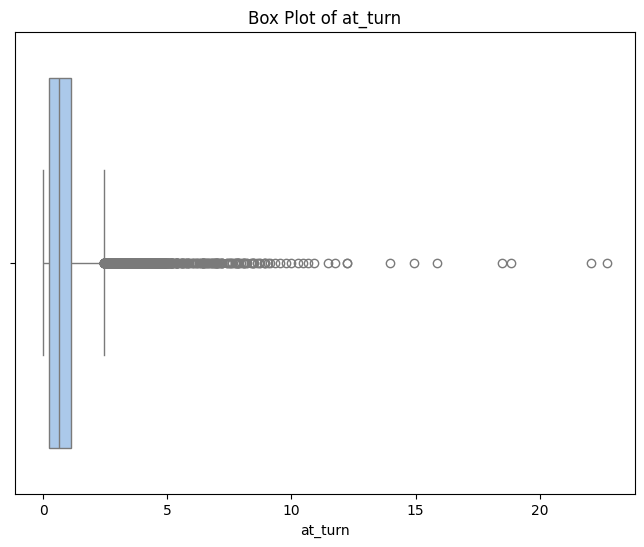

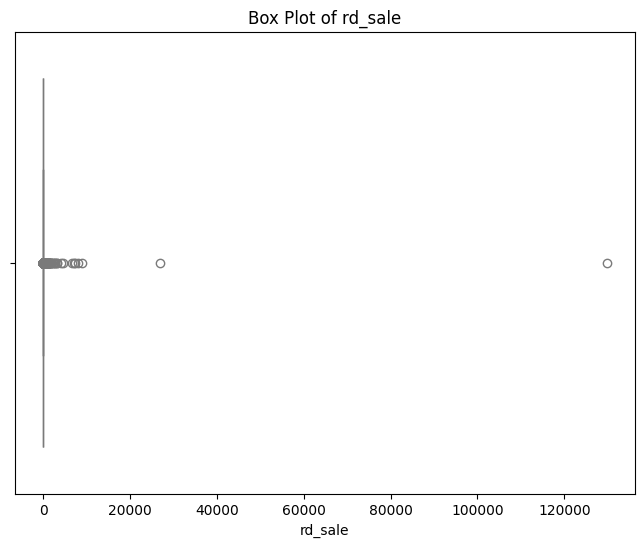

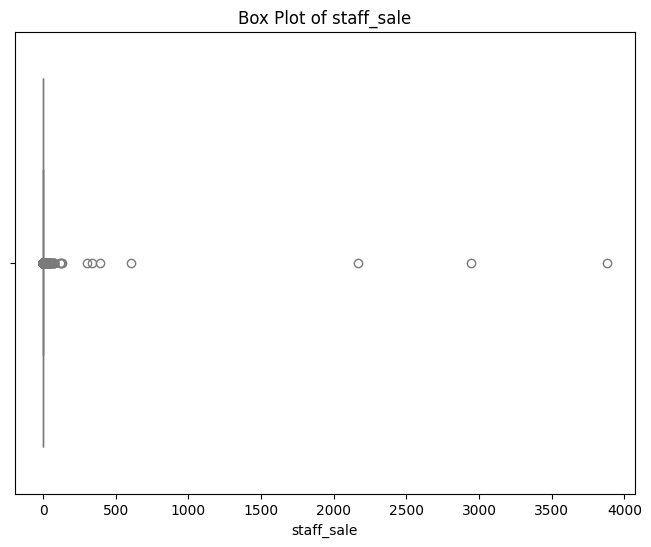

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# You can replace 'df' with the name of your DataFrame

# List of variables
variables = ['invt_act', 'cash_conversion', 'inv_turn', 'at_turn', 'rd_sale', 'staff_sale']

# Set pastel color palette
sns.set_palette("pastel")

# Create box plots for each variable
for variable in variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=wrds[variable])
    plt.title(f'Box Plot of {variable}')
    plt.xlabel(variable)
    plt.show()

## 3 - Merging the Datasets

In [ ]:
comp.columns

Index(['gvkey', 'fyear', 'ticker', 'cusip', 'conm', 'curncd', 'at', 'capx',
       'cogs', 'emp', 'invfg', 'invrm', 'invt', 'invwip', 'ni', 'ppegt',
       'ppent', 'revt', 'xrd', 'xsga', 'busdesc', 'city', 'gind', 'gsector',
       'naics', 'sic'],
      dtype='object')

In [ ]:
wrds.columns

Index(['gvkey', 'ticker', 'cusip', 'year', 'roa', 'invt_act',
       'cash_conversion', 'inv_turn', 'at_turn', 'rd_sale', 'staff_sale'],
      dtype='object')

In [ ]:
comp.rename(columns={'fyear':'year'}, inplace=True)

In [ ]:
merged_inner = pd.merge(comp, wrds, on=['gvkey','year'], how='inner')

In [ ]:
merged_left = pd.merge(comp, wrds, on=['gvkey','year'], how='left')

In [ ]:
print(merged_inner.shape)
print(merged_left.shape)

(54595, 35)
(164419, 35)


In [ ]:
merged_left[(merged_left.gvkey == 1004) & (merged_left.year == 2009)]

,gvkey,year,ticker_x,cusip_x,conm,curncd,at,capx,cogs,emp,...,sic,ticker_y,cusip_y,roa,invt_act,cash_conversion,inv_turn,at_turn,rd_sale,staff_sale
0,1004,2009.0,AIR,000361105,AAR CORP,USD,1501.042,28.855,1065.902,5.8,...,5080,AIR,00036110,0.0905,0.5675,185.1665,2.292,0.994,0.0,0.0


In [ ]:
# Count null values
null_counts_3 = merged_left.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_3 = pd.DataFrame({'Column Name': null_counts_3.index, 'Null Count': null_counts_3.values, 'Null %': null_counts_3.values/len(merged_left)})

# Sort by null counts in descending order
null_counts_df_3 = null_counts_df_3.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_3[null_counts_df_3['Null Count'] > 0]

,Column Name,Null Count,Null %
30,cash_conversion,129196,0.785773
29,invt_act,125549,0.763592
31,inv_turn,125352,0.762394
18,xrd,115017,0.699536
34,staff_sale,112305,0.683041
32,at_turn,112001,0.681193
26,ticker_y,111743,0.679623
27,cusip_y,111627,0.678918
28,roa,109970,0.668840
33,rd_sale,109824,0.667952


In [ ]:
merged_left[merged_left.gsector.isna()]['sic'].unique()

array([6726, 6722, 9995, 6282, 6199, 4911, 3317, 6500, 4813, 1000, 7370,
       8200, 5500, 2090, 1381, 4841, 3420, 4412, 3714, 6153, 6035, 5411,
       4832, 7372, 3600,  100, 5122, 6798, 7990, 2834, 6022, 8062, 6799,
       3949, 1040, 8711, 2836, 2833, 6020, 5160, 3585, 7373, 7812, 6211,
       6311, 1389, 2731, 1400, 1311, 6411])

In [ ]:
merged_left.gsector.unique()

array([20., 45., 40., 55., 35., 50., 60., nan, 10., 15., 30., 25.])


To map the provided Standard Industrial Classification (SIC) codes to their corresponding Global Industry Classification Standard (GICS) sectors (gsector), it's necessary to identify the broad industry category that each SIC code represents. Here is a general mapping based on typical industry groups within the GICS framework:

- (10) Energy (SIC: 1300-1500): 1311, 1381, 1389
- (15) Materials (SIC: 1000-1499, excluding energy-related codes): 1000, 1040, 1400
- (20) Industrials (SIC: 1500-3999): 2090, 3317, 3420, 3585, 3714, 3949
- (25) Consumer Discretionary (SIC: 2300-2999, 3600-4000): 3600, 3949
- (30) Consumer Staples (SIC: 2000-2099): 2090
- (35) Health Care (SIC: 8000-8999): 8062, 8200
- (40) Financials (SIC: 6000-6799): 6020, 6022, 6035, 6153, 6199, 6211, 6282, 6311, 6411, 6722, 6726, 6798, 6799
- (45) Information Technology (SIC: 3570-3999): 7370, 7372, 7373
- (50) Communication Services (SIC: 4800-4899): 4813, 4832, 4841
- (55) Utilities (SIC: 4900-4999): 4911
- (60) Real Estate (SIC: 6500): 6500
- Other (No direct GICS match or miscellaneous): 4412, 5411, 7812, 8711, 9995, 2834, 2833, 2836, 5160, 5122, 7990, 2731

This mapping provides a broad categorization based on typical industry assignments for these SIC codes. Some industries may overlap between sectors; for instance, companies classified under certain SIC codes like 6500 (Real Estate) can also have financial aspects.

In [ ]:
# Mapping SIC codes to GSECTOR

# Energy
energy_sic_list = [1311, 1381, 1389]
merged_left.loc[merged_left['sic'].isin(energy_sic_list), 'gsector'] = 10

# Materials
materials_sic_list = [1000, 1040, 1400]
merged_left.loc[merged_left['sic'].isin(materials_sic_list), 'gsector'] = 15

# Industrials
industrials_sic_list = [2090, 3317, 3420, 3585, 3714, 3949]
merged_left.loc[merged_left['sic'].isin(industrials_sic_list), 'gsector'] = 20

# Consumer Discretionary
cond_sic_list = [3600, 3949]
merged_left.loc[merged_left['sic'].isin(cond_sic_list), 'gsector'] = 25

# Consumer Staples
cons_sic_list = [2090]
merged_left.loc[merged_left['sic'].isin(cons_sic_list), 'gsector'] = 30

# Health Care
healthcare_sic_list = [8062, 8200]
merged_left.loc[merged_left['sic'].isin(healthcare_sic_list), 'gsector'] = 35

# Financials
financials_sic_list = [6020, 6022, 6035, 6153, 6199, 6211, 6282, 6311, 6411, 6722, 6726, 6798, 6799]
merged_left.loc[merged_left['sic'].isin(financials_sic_list), 'gsector'] = 40

# Information Technology
it_sic_list = [7370, 7372, 7373]
merged_left.loc[merged_left['sic'].isin(it_sic_list), 'gsector'] = 45

# Communication Services
commserv_sic_list = [4813, 4832, 4841]
merged_left.loc[merged_left['sic'].isin(commserv_sic_list), 'gsector'] = 50

# Utilities
utilities_sic_list = [4911]
merged_left.loc[merged_left['sic'].isin(utilities_sic_list), 'gsector'] = 55

# Real Estate
realest_sic_list = [6500]
merged_left.loc[merged_left['sic'].isin(realest_sic_list), 'gsector'] = 60

In [ ]:
# Count null values
null_counts_3 = merged_left.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_3 = pd.DataFrame({'Column Name': null_counts_3.index, 'Null Count': null_counts_3.values, 'Null %': null_counts_3.values/len(merged_left)})

# Sort by null counts in descending order
null_counts_df_3 = null_counts_df_3.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_3

,Column Name,Null Count,Null %
30,cash_conversion,129196,0.785773
29,invt_act,125549,0.763592
31,inv_turn,125352,0.762394
18,xrd,115017,0.699536
34,staff_sale,112305,0.683041
32,at_turn,112001,0.681193
26,ticker_y,111743,0.679623
27,cusip_y,111627,0.678918
28,roa,109970,0.668840
33,rd_sale,109824,0.667952


In [ ]:
merged_left.columns

Index(['gvkey', 'year', 'ticker_x', 'cusip_x', 'conm', 'curncd', 'at', 'capx',
       'cogs', 'emp', 'invfg', 'invrm', 'invt', 'invwip', 'ni', 'ppegt',
       'ppent', 'revt', 'xrd', 'xsga', 'busdesc', 'city', 'gind', 'gsector',
       'naics', 'sic', 'ticker_y', 'cusip_y', 'roa', 'invt_act',
       'cash_conversion', 'inv_turn', 'at_turn', 'rd_sale', 'staff_sale'],
      dtype='object')

In [ ]:
merged_final = merged_left.drop(columns=['ticker_x', 'cusip_x', 'ppegt', 'busdesc', 'gind', 'naics'], axis=1)
merged_final.rename(columns={'ticker_y':'ticker', 'cusip_y':'cusip'}, inplace=True)
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164419 entries, 0 to 164418
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   gvkey            164419 non-null  int64  
 1   year             164195 non-null  float64
 2   conm             164419 non-null  object 
 3   curncd           164195 non-null  object 
 4   at               124031 non-null  float64
 5   capx             108048 non-null  float64
 6   cogs             108931 non-null  float64
 7   emp              103468 non-null  float64
 8   invfg            78429 non-null   float64
 9   invrm            78068 non-null   float64
 10  invt             112399 non-null  float64
 11  invwip           77783 non-null   float64
 12  ni               108930 non-null  float64
 13  ppent            120399 non-null  float64
 14  revt             123436 non-null  float64
 15  xrd              49402 non-null   float64
 16  xsga             91117 non-null   floa

In [ ]:
# Count null values
null_counts_3 = merged_final.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_3 = pd.DataFrame({'Column Name': null_counts_3.index, 'Null Count': null_counts_3.values, 'Null %': null_counts_3.values/len(merged_final)})

# Sort by null counts in descending order
null_counts_df_3 = null_counts_df_3.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_3[null_counts_df_3['Null %'] > 0.2]

,Column Name,Null Count,Null %
24,cash_conversion,129196,0.785773
23,invt_act,125549,0.763592
25,inv_turn,125352,0.762394
15,xrd,115017,0.699536
28,staff_sale,112305,0.683041
26,at_turn,112001,0.681193
20,ticker,111743,0.679623
21,cusip,111627,0.678918
22,roa,109970,0.668840
27,rd_sale,109824,0.667952


In [ ]:
# Dropping columns with more than 20% null values (Keeping ratios 'invt_act' and 'inv_turn')
merged_final.drop(columns=['ppent','capx','emp','xsga','invfg','invrm','invwip','cusip','ticker','cash_conversion','inv_turn','invt_act'], axis=1, inplace=True)

# Dropping NULLs from the above 2 ratios
merged_data_0 = merged_final.dropna(subset=['at','revt','ni','cogs','invt','gsector'])

print("Original merged data:", merged_final.shape)
print("Final merged data:", merged_data_0.shape)

Original merged data: (164419, 17)
Final merged data: (107268, 17)


In [ ]:
# Count null values
null_counts_4 = merged_data_0.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_4 = pd.DataFrame({'Column Name': null_counts_4.index, 'Null Count': null_counts_4.values, 'Null %': null_counts_4.values/len(merged_data_0)})

# Sort by null counts in descending order
null_counts_df_4 = null_counts_df_4.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_4[null_counts_df_4['Null Count'] > 0]

,Column Name,Null Count,Null %
16,staff_sale,63293,0.590045
14,at_turn,63000,0.587314
13,roa,61214,0.570664
15,rd_sale,61180,0.570347
9,xrd,58110,0.541727


In [ ]:
merged_data_0.shape

(107268, 17)

In [ ]:
# # Imputing NULLs for the above columns

# columns_to_impute = ['staff_sale', 'at_turn', 'roa', 'rd_sale', 'xrd']

# for column in columns_to_impute:
#     # Impute null values with the median of each group defined by 'gvkey'
#     merged_data_0[column] = merged_data_0.groupby('gvkey')[column].transform(lambda x: x.fillna(x.median()))

In [ ]:
merged_data_fin = merged_data_0.dropna(subset=['xrd'])
print(merged_data_0.shape)
print(merged_data_fin.shape)

(107268, 17)
(49158, 17)


In [ ]:
# Count null values
null_counts_4 = merged_data_fin.isnull().sum()

# Create a DataFrame to store null counts and column names
null_counts_df_4 = pd.DataFrame({'Column Name': null_counts_4.index, 'Null Count': null_counts_4.values, 'Null %': null_counts_4.values/len(merged_data_fin)})

# Sort by null counts in descending order
null_counts_df_4 = null_counts_df_4.sort_values(by='Null Count', ascending=False)

# Display the table
null_counts_df_4[null_counts_df_4['Null Count'] > 0]

,Column Name,Null Count,Null %
16,staff_sale,25571,0.520180
14,at_turn,25309,0.514850
13,roa,23699,0.482099
15,rd_sale,23683,0.481773


In [ ]:
# Final Dataset 0 Merged
print(merged_data_0.shape)
merged_data_0.to_csv('/content/gdrive/MyDrive/BA875-Team01-Project/Dataset0_Merged.csv')

(107268, 17)


In [ ]:
merged_data_0.head()

,gvkey,year,conm,curncd,at,cogs,invt,ni,revt,xrd,city,gsector,sic,roa,at_turn,rd_sale,staff_sale
0,1004,2009.0,AAR CORP,USD,1501.0420,1065.902,496.90399,44.627998,1352.1510,NaN,Wood Dale,20.0,5080,0.09050,0.99400,0.0,0.0
1,1004,2010.0,AAR CORP,USD,1703.7271,1408.071,507.27399,69.825996,1775.7820,NaN,Wood Dale,20.0,5080,0.08250,1.00475,0.0,0.0
2,1004,2011.0,AAR CORP,USD,2195.6531,1662.408,599.75201,67.723000,2074.4980,NaN,Wood Dale,20.0,5080,0.10750,1.10100,0.0,0.0
3,1004,2012.0,AAR CORP,USD,2136.8999,1714.500,582.90002,55.000000,2167.1001,NaN,Wood Dale,20.0,5080,0.11625,1.01350,0.0,0.0
4,1004,2013.0,AAR CORP,USD,2199.5000,1581.400,632.90002,72.900002,2035.0000,NaN,Wood Dale,20.0,5080,0.11275,0.94325,0.0,0.0
